# What makes a book sell?
This project explores what factors may be associated with higher book sales, such as author reputation, genre, and sale price. The data was found on [Kaggle](https://www.kaggle.com/datasets/thedevastator/books-sales-and-ratings/discussion?sort=hotness). This is a demonstration only; information on data curation is unknown but serves to illustrate potential issues and how to handle them. This should not be used to assume real-world trends in book sales.

# Table of Contents
* [1. Inspecting the Data](#section1)
* [2. Cleaning the Data](#section2)
* [3. Exploratory Data Analysis](#section3)
* [4. Hypothesis Testing](#section4)

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

## 1. Inspecting the Data <a class="anchor" id="section1"></a>

In [5]:
filepath = r"..\Book_Sales_Dataset\Book_Sales_Dataset.csv"
df = pd.read_csv(filepath)

In [8]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


A few things to clean up:
1. Standardize column names
2. Check language code, can see two versions of English
3. Check genres, two variations of "fiction"
4. Due to genre issue, sales rank may need to be adjusted

Also noticed the book rating is likely a 5-point scale.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

There are several missing values for book titles and language codes.

In [14]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


Need to check:
* Minimum year value is negative.
* Minimum publisher revenue is zero, as well as first quartile.
* Publisher revenue has a std dev that is almost 4x as large as the mean (but the max value is enormous given the other stats).
* Units sold also has a std dev larger than the mean.

## 2. Cleaning the Data <a class="anchor" id="section2"></a>

Removing duplicate rows:

In [20]:
df = df.drop_duplicates()

Normalize whitespace and case:

In [28]:
df.columns = df.columns.str.strip().str.lower().str.replace('_',' ')
df.head()

,index,publishing year,book name,author,language code,author rating,book average rating,book ratings count,genre,gross sales,publisher revenue,sale price,sales rank,publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


Standardizing entries (language, genres, rank):

In [31]:
#language_code
df['language code'].unique()

array(['en-US', 'eng', nan, 'spa', 'en-GB', 'fre', 'en-CA', 'nl', 'ara'],
      dtype=object)

In [33]:
df['language code'] = df['language code'].replace('eng','en-US')

In [35]:
#genres
df['genre'].unique()

array(['genre fiction', 'fiction', 'nonfiction', 'children'], dtype=object)

In [37]:
df['genre'] = df['genre'].replace('genre fiction','fiction')

Adjusting sales rank for fixed genre categories:

In [40]:
#sales rank: Defined by notes in dataset as a numeric value indicating a book's rank based on its sales performance in comparison to other books within its category (genre).
df['sales rank'] = df.groupby('genre')['gross sales'].rank(method='dense',ascending=False).astype(int)

print(df[['genre','sales rank','gross sales']].sort_values(by=['genre','sales rank'])
      .groupby('genre').head(5)) #checking if ranks match gross sales with fixed genres

          genre  sales rank  gross sales
320    children           1      1877.82
329    children           2      1635.93
418    children           3      1480.05
571    children           4      1448.55
552    children           5      1427.42
2       fiction           1     47795.00
3       fiction           2     41250.00
4       fiction           3     37952.50
0       fiction           4     34160.00
6       fiction           5     27491.67
7    nonfiction           1     26182.00
117  nonfiction           2     10731.05
28   nonfiction           3      9576.00
116  nonfiction           4      5841.00
72   nonfiction           5      5826.64


Check negative years:

In [44]:
df[df['publishing year']<0] #checking for others, they are BCE

,index,publishing year,book name,author,language code,author rating,book average rating,book ratings count,genre,gross sales,publisher revenue,sale price,sales rank,publisher,units sold
241,241,-380.0,Î Î¿Î»Î¹Ï„ÎµÎ¯Î±,"Plato, Desmond Lee",en-US,Intermediate,3.90,110274,fiction,387.09,232.254,0.99,581,"Amazon Digital Services, Inc.",391
293,293,-430.0,ÎŸá¼°Î´Î¯Ï€Î¿Ï…Ï‚ Î¤ÏÏÎ±Î½Î½Î¿Ï‚,"Sophocles, J.E. Thomas",en-US,Intermediate,3.67,119496,fiction,2460.92,1476.552,7.99,139,Hachette Book Group,308
568,568,-300.0,é“å¾·ç¶“ [dÃ o dÃ© jÄ«ng],"Lao Tzu, Gia-Fu Feng, Jane English, Chungliang...",en-US,Excellent,4.31,39863,fiction,665.55,399.330,4.59,466,Penguin Group (USA) LLC,3915
589,589,-560.0,Aesopica,"Aesop, Laura Harris, Laura Gibbs",en-US,Excellent,4.05,88508,fiction,693.61,0.000,4.99,459,"Amazon Digital Services, Inc.",53784
749,749,-17.0,Ã†neis,"Virgil, Robert Fitzgerald",en-US,Intermediate,3.81,75051,fiction,114.84,0.000,0.99,684,"Amazon Digital Services, Inc.",31752
990,990,-441.0,á¼ˆÎ½Ï„Î¹Î³ÏŒÎ½Î·,"Sophocles, J.E. Thomas",en-US,Intermediate,3.60,67608,fiction,106.92,64.152,0.99,692,"Amazon Digital Services, Inc.",108


Names are corrupted from original file (checked) titles are in other languages. Will not be analyzing book titles so not an issue.

Check publisher revenue:

<function matplotlib.pyplot.show(close=None, block=None)>

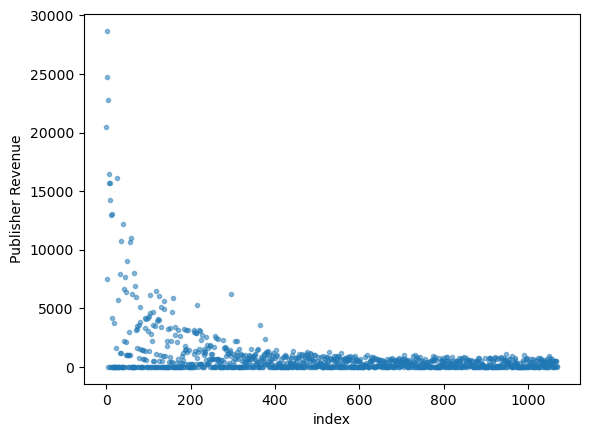

In [48]:
plt.scatter(df.index,df['publisher revenue'],marker='.',alpha=0.5)
plt.ylabel('Publisher Revenue')
plt.xlabel('index')
plt.show

There are a lot of values that appear to be sitting at zero.

In [51]:
zero_counts = (df == 0).sum()
print(zero_counts)

index                    1
publishing year          0
book name                0
author                   0
language code            0
author rating            0
book average rating      0
book ratings count       0
genre                    0
gross sales              0
publisher revenue      372
sale price               0
sales rank               0
publisher                0
units sold               0
dtype: int64


In [53]:
zero_revenue = df[df['publisher revenue'] == 0]
zero_revenue_group = zero_revenue['publisher'].value_counts()
print(zero_revenue_group)

publisher
Amazon Digital Services,  Inc.    372
Name: count, dtype: int64


These are very likely placeholders for missing values, given they are all from a single publisher. Convert to NaN and avoid using if analyzing publisher revenue.

In [56]:
df['publisher revenue'] = df['publisher revenue'].replace(0,np.nan)
zero_counts = (df == 0).sum()
print(zero_counts) #verify

index                  1
publishing year        0
book name              0
author                 0
language code          0
author rating          0
book average rating    0
book ratings count     0
genre                  0
gross sales            0
publisher revenue      0
sale price             0
sales rank             0
publisher              0
units sold             0
dtype: int64


Adressing missing book titles:

In [59]:
df['book name'].isna().sum()
df['book name'].isna().mean() #% of dataset missing
# df[df['Book Name'].isna()].describe(include='all')
df[df['book name'].isna()].head()
df['has_title'] = df['book name'].notna()
df.groupby('has_title')[['book average rating','units sold','gross sales','sale price']].mean()
#Lower units sold correlating to higher gross sales and sale price suggests these are bundles of single titles, exclude since I only care about single books

,book average rating,units sold,gross sales,sale price
has_title,,,,
False,4.209565,4112.043478,2284.985652,6.147391
True,4.002550,9799.228271,1847.212875,4.841490


Missing titles likely bundles, due to lower units sold but similar gross sales and higher price per unit. This analysis will omit these entries to focus on single books only.

In [62]:
df = df[df['book name'].notna()].copy()

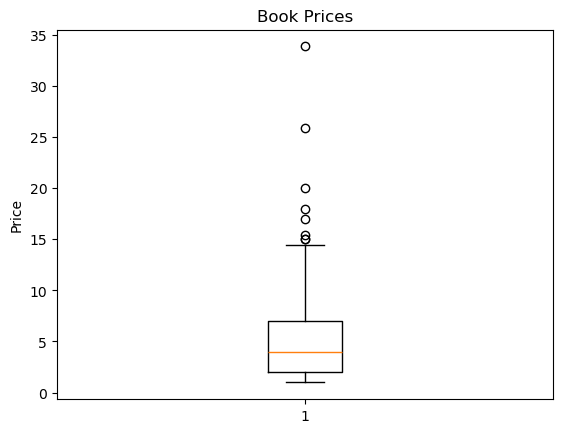

whisker values: [0.99, 14.44]


In [69]:
#May be other bundles that are not filtered out
box = plt.boxplot(df['sale price'])
plt.title('Book Prices')
plt.ylabel('Price')
plt.show()

whiskers = [line.get_ydata()[1] for line in box['whiskers']]
print('whisker values:',whiskers)
max_whisker = whiskers[1]

In [71]:
outliers = df[df['sale price'] > max_whisker]
print(outliers[['book name','sale price','publishing year']])

                        book name  sale price  publishing year
158               Beautiful Ruins       14.99           2012.0
216                       Sabriel       19.98           1995.0
295       The Wind in the Willows       33.86           1908.0
365   We Need to Talk About Kevin       25.89           2003.0
377              The Tenth Circle       17.98           2006.0
949   Alanna: The First Adventure       16.98           1983.0
991                      Brooklyn       15.37           2009.0
1049                 Et dukkehjem       14.99           1879.0


None of these appear to be bundles of individual books, but they may be hardbacks or brand new. The mean of book prices is awfully low for new books, so this dataset is likely from a used book store. In that case, these books may be outliers due to being in better condition or a different print version. 

This speaks to the poor quality and detail of the dataset, ideally there would be columns for print type, page length, and other variables that might give more insight or allow me to narrow what books are being analyzed. But for the purpose of this demonstration I will continue with these outliers omitted.


In [74]:
df = df[df['sale price'] <= max_whisker].copy()
print(df['sale price'].max()) #verify

14.44


Addressing missing language data:

In [77]:
df['language code'].isna().sum()
df['language code'].isna().mean()

0.04716073147256978

In [79]:
df[df['language code'].isna()].head()
df['has_language'] = df['language code'].notna()
df.groupby('has_language')[['gross sales','units sold','book average rating','sale price','publisher revenue']].mean()

,gross sales,units sold,book average rating,sale price,publisher revenue
has_language,,,,,
False,1075.855102,9736.408163,3.992245,4.878980,809.533125
True,1855.942253,9863.350505,4.004131,4.717101,1280.562973


Missing language code likely MNAR (could be related to publisher revenue). Language is not something I'm interested in investigating, so we will ignore this.

## 3. Exploratory Data Analysis <a class="anchor" id="section3"></a>

In [83]:
grouped_genre_units = df.groupby('genre')['units sold'].sum().sort_values(ascending=False)
print(grouped_genre_units)

genre
fiction       8320074
nonfiction    1623609
children       298118
Name: units sold, dtype: int64


Sanity Check: Does the revenue correlate to which genre the book is? Would assume yes based on previous cell.

In [86]:
grouped_genre_sales = df.groupby('genre')['gross sales'].sum().sort_values(ascending=False)
print(grouped_genre_sales)

genre
fiction       1650437.48
nonfiction     225760.03
children        13902.22
Name: gross sales, dtype: float64


Fiction appears to sell more and generate more revenue than other genres. Consider limiting analysis to this genre for certain comparisons.

Sanity check: We would expect the number of units sold to correlate with publisher revenue.

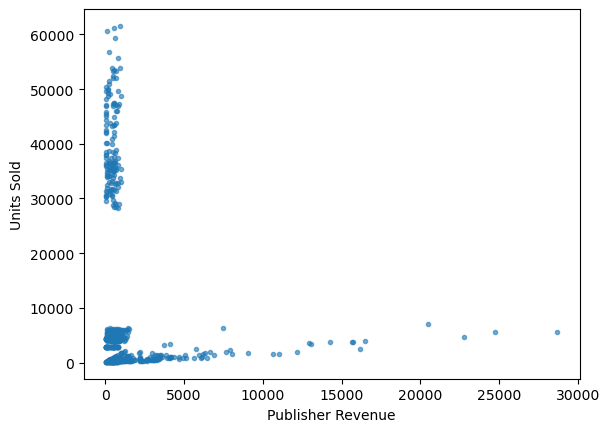

Zero placeholders remaining: 0


In [98]:
#isolate non-missing publisher revenue rows
df = df[df['publisher revenue'].notna()].copy()

plt.scatter(df['publisher revenue'],df['units sold'],alpha=0.6,marker='.')
plt.xlabel('Publisher Revenue')
plt.ylabel('Units Sold')
plt.show()

print('Zero placeholders remaining:',(df['publisher revenue']==0).sum()) 

This plot highlights a gap in the data collection. There is also the possibility that the number of units sold gathered for this dataset was not related only to the publishers listed, as evident by a massively high value of units sold with low revenue.

In [101]:
high_units = df[df['units sold'] > 20000]
low_units = df[df['units sold'] < 20000]
mean_high_units = high_units['sale price'].mean()
mean_low_units = low_units['sale price'].mean()

print("Mean sale price of high units sold: ",mean_high_units)
print("Mean sale price of low units sold: ",mean_low_units)

Mean sale price of high units sold:  5.6943478260869576
Mean sale price of low units sold:  5.644429906542056


The average price of books would not account for the massive drop in publisher revenue.

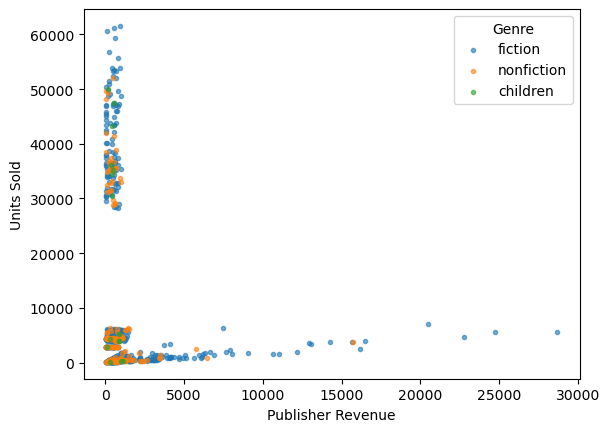

In [104]:
#Check if genre has anything to do with suspiciously low Publisher Revenues at high Units Sold
genres = df['genre'].unique()
colors = plt.cm.tab10.colors

genre_color = dict(zip(genres, colors))

for genre in genres:
    genre_data = df[df['genre'] == genre]
    plt.scatter(
        genre_data['publisher revenue'],
        genre_data['units sold'],
        label=genre,
        color=genre_color[genre],
        alpha=0.6,
        marker='.'
    )

plt.xlabel('Publisher Revenue')
plt.ylabel('Units Sold')
plt.legend(title='Genre')
plt.show()

Likely dataset was not curated well.

Let's explore the outliers:

Max value of gap: 28296
Min value of gap: 7000


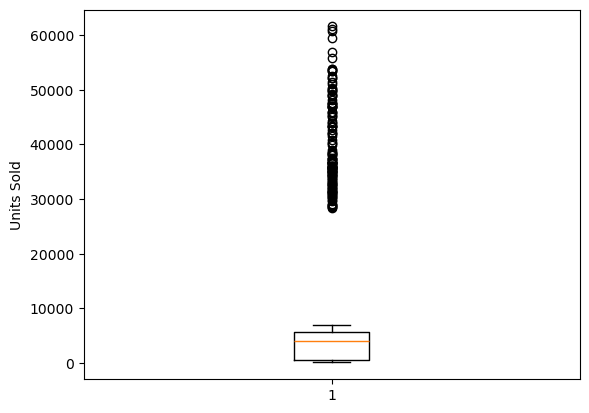

In [107]:
high_units_sold = df[df['units sold'] > 20000]
low_units_sold = df[df['units sold'] < 20000]
print('Max value of gap:',high_units_sold['units sold'].min())
print('Min value of gap:',low_units_sold['units sold'].max())

plt.boxplot(df['units sold'])
plt.ylabel('Units Sold')
plt.show()

We would expect that for a given book, the gross sales would equal a value close to the sale price times units sold. We will attempt to isolate reasonable values.

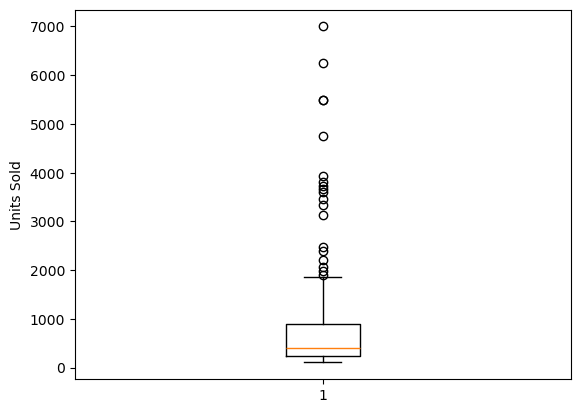

In [110]:
df['revenue issue'] = (df['gross sales'] > df['sale price'] * df['units sold'] * 0.9) #allowing 10% window

flagged_revenue = df[df['revenue issue'] == True]

plt.boxplot(flagged_revenue['units sold'])
plt.ylabel('Units Sold')
plt.show()

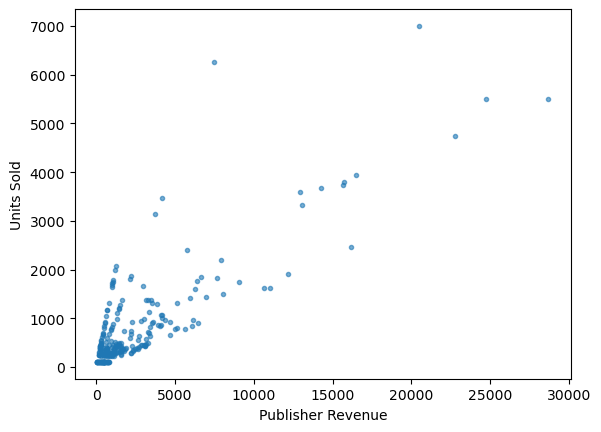

In [112]:
plt.scatter(flagged_revenue['publisher revenue'],flagged_revenue['units sold'],marker='.',alpha=0.6)
plt.xlabel('Publisher Revenue')
plt.ylabel('Units Sold')
plt.show()

This is more reasonable. Since there's a likelihood that Publisher Revenue or Units Sold omitted are related to unknown data collection errors, analysis will focus on these rows only.

In [115]:
df = flagged_revenue

We will now check the Units Sold to potential correlations:
* Genre
* Author rating
* Average book rating
* Sale price
* Publishing year

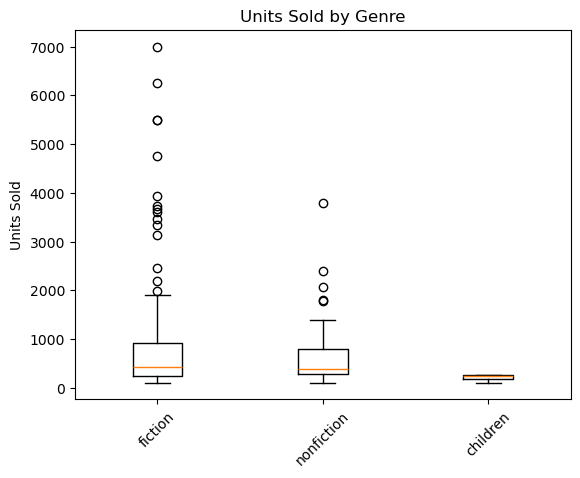

In [118]:
#Genre
categories = df['genre'].unique()
data = [df[df['genre'] == cat]['units sold'] for cat in categories]

plt.boxplot(data,labels=categories)
plt.xticks(rotation=45)
plt.ylabel('Units Sold')
plt.title('Units Sold by Genre')
plt.show()

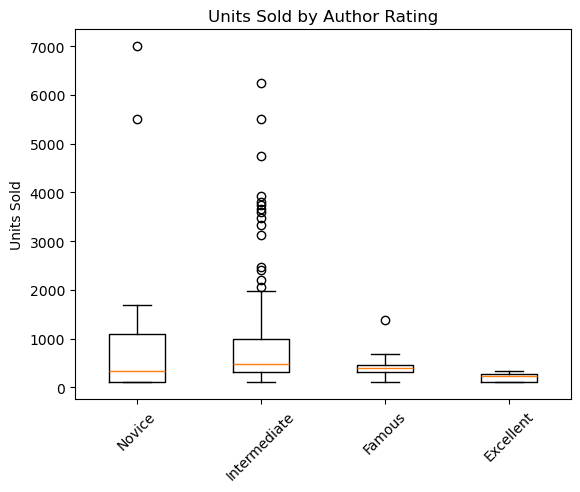

In [120]:
#Author rating
categories = df['author rating'].unique()
data = [df[df['author rating'] == cat]['units sold'] for cat in categories]

plt.boxplot(data,labels=categories)
plt.xticks(rotation=45)
plt.ylabel('Units Sold')
plt.title('Units Sold by Author Rating')
plt.show()

In [122]:
df.groupby(['author rating'])['units sold'].agg(['count', 'mean', 'median', 'std'])

,count,mean,median,std
author rating,,,,
Excellent,39,201.051282,238.0,87.100350
Famous,10,475.500000,392.0,352.040165
Intermediate,209,848.889952,478.0,951.051231
Novice,11,1458.363636,340.0,2436.487196


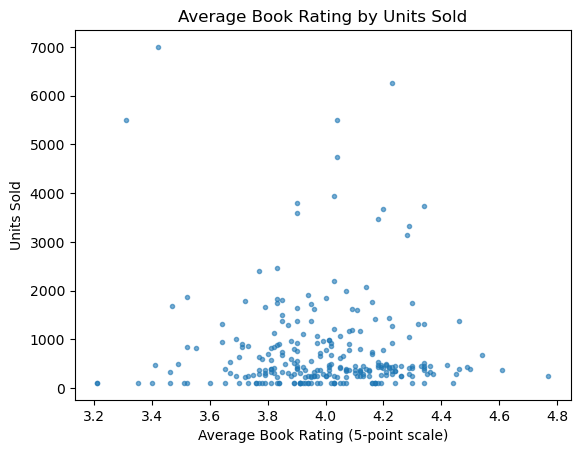

In [124]:
#Average book rating
plt.scatter(df['book average rating'],df['units sold'],marker='.',alpha=0.6)
plt.ylabel('Units Sold')
plt.xlabel('Average Book Rating (5-point scale)')
plt.title('Average Book Rating by Units Sold')
plt.show()

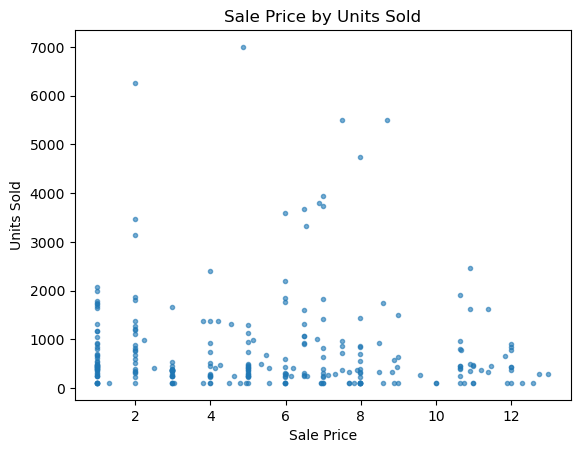

In [126]:
#Sale price
plt.scatter(df['sale price'],df['units sold'],marker='.',alpha=0.6)
plt.ylabel('Units Sold')
plt.xlabel('Sale Price')
plt.title('Sale Price by Units Sold')
plt.show()

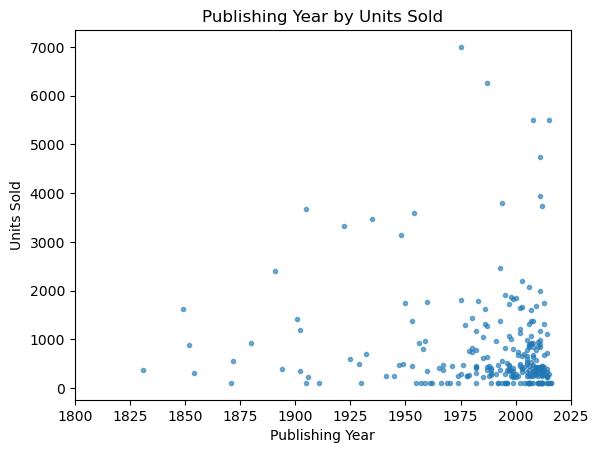

In [128]:
#Publishing year
plt.scatter(df['publishing year'],df['units sold'],marker='.',alpha=0.6)
plt.ylabel('Units Sold')
plt.xlabel('Publishing Year')
plt.xlim(1800,2025)
plt.title('Publishing Year by Units Sold')
plt.show()

These observations suggest a possible relationship between Units Sold and Author Rating. 

# 4. Hypothesis Testing <a class="anchor" id="section4"></a>
$H_0$: The mean for Units Sold is the same across all author rating groups.

$H_1$: At least one author rating group has a significantly different Units Sold mean.

In [132]:
#Test if data is normalized
from scipy.stats import shapiro

df['group_mean'] = df.groupby('author rating')['units sold'].transform('mean')
df['residuals'] = df['units sold'] - df['group_mean']

for group in df['author rating'].unique():
    group_resid = df[df['author rating'] == group]['residuals']
    stat, p = shapiro(group_resid)
    print(f"{group}: W={stat:.4f}, p={p:.4f}")

Novice: W=0.6243, p=0.0001
Intermediate: W=0.6926, p=0.0000
Famous: W=0.7574, p=0.0044
Excellent: W=0.7970, p=0.0000


Data is not normalized ($p<0.05$), move on to non-parametric Kruskal-Wallis H-test

In [135]:
from scipy.stats import kruskal

groups = [df[df['author rating'] == grp]['units sold']
          for grp in df['author rating'].unique()]

stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H = {stat:.4f}, p = {p:.4f}")

Kruskal-Wallis H = 50.0786, p = 0.0000


As $p<0.05$, $H_0$ is rejected. A difference between at least two groups exists. A post-hoc test is required to evaluate which groups are statistically different.

In [138]:
import scikit_posthocs as sp

data = df[['author rating', 'units sold']]
sp.posthoc_dunn(data, val_col='units sold', group_col='author rating', p_adjust='holm') #6 pairwise comparisons

,Excellent,Famous,Intermediate,Novice
Excellent,1.000000e+00,0.050177,1.083762e-11,0.050177
Famous,5.017682e-02,1.000000,7.714196e-01,0.941029
Intermediate,1.083762e-11,0.771420,1.000000e+00,0.771420
Novice,5.017682e-02,0.941029,7.714196e-01,1.000000


The adjusted p-value of $1.08 x 10^{-11}$ denotes a significant difference between Excellent- and Intermediate-rated authors. The boxplot made previously shows that Intermediate-rated authors sell more books.

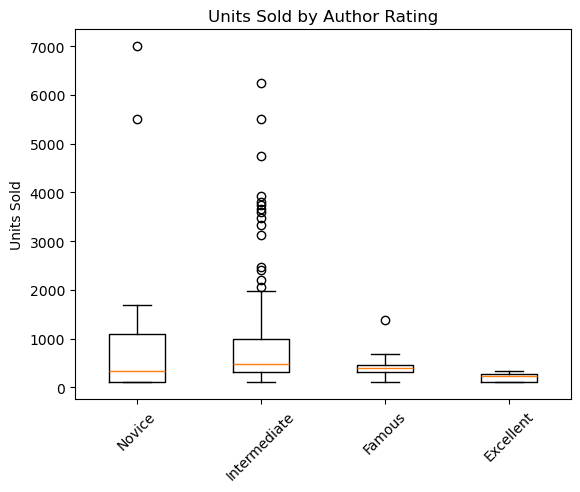

In [141]:
categories = df['author rating'].unique()
data = [df[df['author rating'] == cat]['units sold'] for cat in categories]

plt.boxplot(data,labels=categories)
plt.xticks(rotation=45)
plt.ylabel('Units Sold')
plt.title('Units Sold by Author Rating')
plt.show()

The alternative hypothesis is supported, however we do not know what contributes to Intermediate authors selling more books.

# Key Findings

1. Units sold and author rating showed a statistically significant relationship using the Kruskal-Wallis H-test ($H=50.08$, $p<0.001$).
    * Using a Dunn post-hoc test with Holm-adjusted p-values, it was established that Intermediate-rated authors had higher mean unit sales than Excellent-rated authors. 
2. This dataset was discovered to have several curation issues that limited analysis or had to be fixed:
    * The units sold column was missing all values between 7000 and 28296.
    * The publisher revenue column had many low values for units sold given the corresponding sale price, suggesting revenue data collected may not have been directly related to the publisher listed for each book.
    * The list of publishers, languages, and years books were published in was limited.
    * The sales rankings were described as being tied to sales performance compared to other books in each genre, but were missing values or had tied rankings.

### What I would do next (with more complete data)
* Control for variables such as genre or publisher size to isolate effect of author rating more precisely.
* Model predictions of units sold based on relevant variables (assuming data showed more trends).
* Explore trends such as book price or units sold over time.